<a href="https://colab.research.google.com/github/LeeGyuWon0427/Python-code-with-BJ/blob/main/(%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC)Titanic2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 마운트 및 데이터 로드

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/train(타이타닉).csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 데이터 전처리

In [ ]:
# 결측지 확인
titanic_null = df.isnull().sum()
titanic_null

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# 데이터 선택 --> id, name, ticket, fare, cabin 지우기
df.drop(['PassengerId',"Name",'Ticket',"Fare",'Cabin'], axis=1, inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [ ]:
# age 결측지를 중간값으로 채우기
age_median = df['Age'].median()
df['Age'].fillna(age_median, inplace=True) #
df['Age'].isnull().sum()

0

In [ ]:
# 날려버리기 / 결측치가 있는거 그 데이터 자체를 삭제
df.dropna(axis=0, how='any', inplace=True) # how
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,28.0,1,2,S
889,1,1,male,26.0,0,0,C


In [ ]:
# vectorization = mapping
sex_mapping = {'male':0, 'female':1}
embarked_mapping = {'S':0, 'C':1, 'Q':2}
df['Sex'] = df['Sex'].map(sex_mapping)
df['Embarked'] = df['Embarked'].map(embarked_mapping)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,0
1,1,1,1,38.0,1,0,1
2,1,3,1,26.0,0,0,0
3,1,1,1,35.0,1,0,0
4,0,3,0,35.0,0,0,0
...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,0
887,1,1,1,19.0,0,0,0
888,0,3,1,28.0,1,2,0
889,1,1,0,26.0,0,0,1


In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [ ]:
titanic_data = df.drop('Survived',axis=1)
titanic_target = pd.DataFrame(data=df['Survived']) # 정답

In [ ]:
titanic_data

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,0,22.0,1,0,0
1,1,1,38.0,1,0,1
2,3,1,26.0,0,0,0
3,1,1,35.0,1,0,0
4,3,0,35.0,0,0,0
...,...,...,...,...,...,...
886,2,0,27.0,0,0,0
887,1,1,19.0,0,0,0
888,3,1,28.0,1,2,0
889,1,0,26.0,0,0,1


In [ ]:
titanic_target

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


# 의사결정트리

In [ ]:
# 추론하기 위해서는 항상 train, test로 나눠야 함
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(titanic_data, titanic_target, test_size=0.1, random_state=13) # 학습에 사용하는 데이터는 대문자래 / 0.1 = 10%
X_train.shape

(800, 6)

In [ ]:
X_test.shape

(89, 6)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5, random_state=13) # max_depth=3은 3개의 층을 만드는 의미

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=13)

In [ ]:
model.score(X_test, y_test)

0.8314606741573034

In [ ]:
model.score(X_train, y_train)

0.85625

In [ ]:
predict_df = pd.DataFrame({
    'Pclass':2,	# 객실등급
    'Sex':1,	# 1이 여자, 2가 남자
    'Age':18,
    'SibSp':2,
    'Parch':2,
    'Embarked':1
}, index=['index'])

In [ ]:
model.predict(predict_df)
predict_df

,Pclass,Sex,Age,SibSp,Parch,Embarked
index,2,1,18,2,2,1


In [ ]:
model.predict(predict_df)

array([1])

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(
    model, # 생성한 의사결정트리 모델
    out_file = 'titanic.dot', # 파일 저장 유무, dot 포맷
    feature_names=['Pclass','Sex','Age','SibSp','Parch','Embarked'],
    class_names=['unsurvived','survived'],
    filled = True, # 둥근노드 상자
    rounded = True # 노드의 클래스가 구분되도록 색칠
)

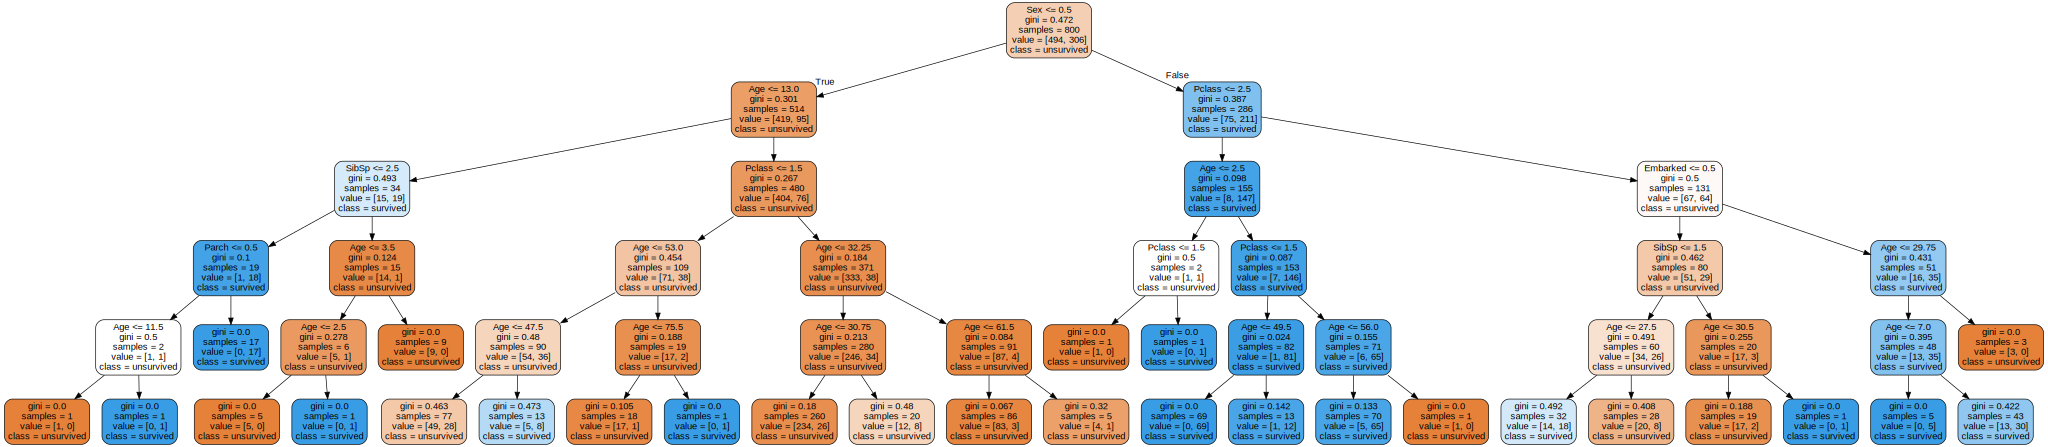

In [ ]:
import graphviz # doc언어 스크립트로 지정된 그래프 그리기를 위해 AT&T 랩스 리서치가 시작한 오픈 소스 패키지
with open('titanic.dot') as f:
  dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format='png'
dot.render(filename='titanic_tree', directory='images/decisions_trees', cleanup=True)
dot

In [ ]:
# 정확도 검증
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred) # 예측값을 통해서 점수 냄

0.8314606741573034

In [ ]:
def isSurvived(name, person): # name 사람이름 넣을거고, person은 특성 넣을 거
  isSurvived = 'not survivied' if model.predict([person])[0] == 0 else 'survived'
  print(name,'is',isSurvived)

In [ ]:
Jack_Dawson = [3,0,20,0,0,1]
isSurvived('Jack_Dawson', Jack_Dawson)

Jack_Dawson is not survivied


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
Rose = [1,1,19,0,1,2]
isSurvived('Rose', Rose)

Rose is survived


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
